## Load Data

In [1]:
# Use pandas to read data as a dataframe 
import pandas as pd 
features = pd.read_csv('temps_extended.csv')
features.head(5)

,year,month,day,weekday,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
0,2011,1,1,Sat,4.92,0.00,0,36,37,45.6,40,40
1,2011,1,2,Sun,5.37,0.00,0,37,40,45.7,39,50
2,2011,1,3,Mon,6.26,0.00,0,40,39,45.8,42,42
3,2011,1,4,Tues,5.59,0.00,0,39,42,45.9,38,59
4,2011,1,5,Wed,3.80,0.03,0,42,38,46.0,45,39


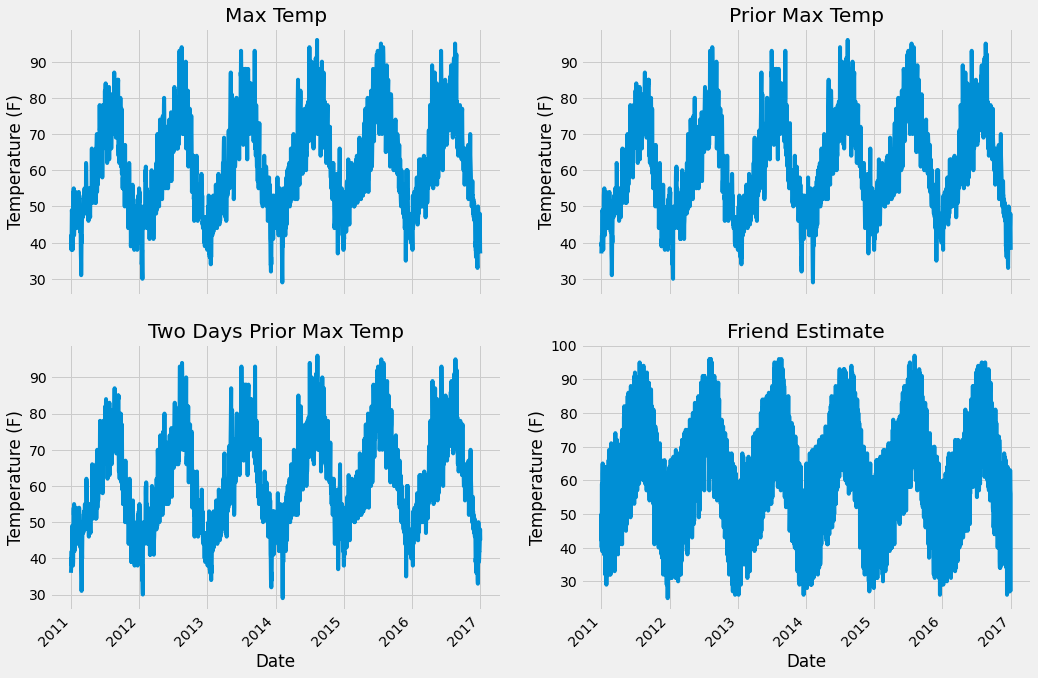

In [2]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks; Import datetime
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
import datetime

# Get years, months, and days
years = features['year']
months = features['month']
days = features['day']

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Set up the plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
fig.autofmt_xdate(rotation = 45)

# Actual max temperature measurement
ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature (F)'); ax1.set_title('Max Temp')

# Temperature from 1 day ago
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature (F)'); ax2.set_title('Prior Max Temp')

# Temperature from 2 days ago
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature (F)'); ax3.set_title('Two Days Prior Max Temp')

# Friend Estimate
ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature (F)'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

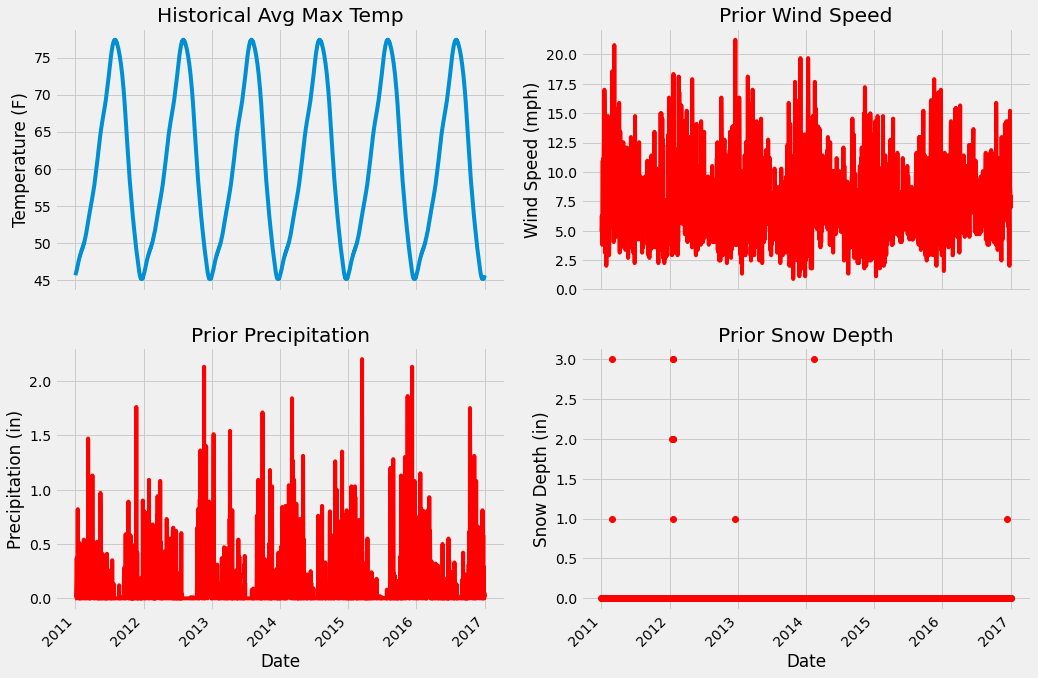

In [3]:
# Set up the plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
fig.autofmt_xdate(rotation = 45)

# Historical Average Max Temp
ax1.plot(dates, features['average'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature (F)'); ax1.set_title('Historical Avg Max Temp')

# Prior Avg Wind Speed 
ax2.plot(dates, features['ws_1'], 'r-')
ax2.set_xlabel(''); ax2.set_ylabel('Wind Speed (mph)'); ax2.set_title('Prior Wind Speed')

# Prior Precipitation
ax3.plot(dates, features['prcp_1'], 'r-')
ax3.set_xlabel('Date'); ax3.set_ylabel('Precipitation (in)'); ax3.set_title('Prior Precipitation')

# Prior Snowdepth
ax4.plot(dates, features['snwd_1'], 'ro')
ax4.set_xlabel('Date'); ax4.set_ylabel('Snow Depth (in)'); ax4.set_title('Prior Snow Depth')

plt.tight_layout(pad=2)

<ipython-input-4-4305020a0db4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_features['season'] = seasons


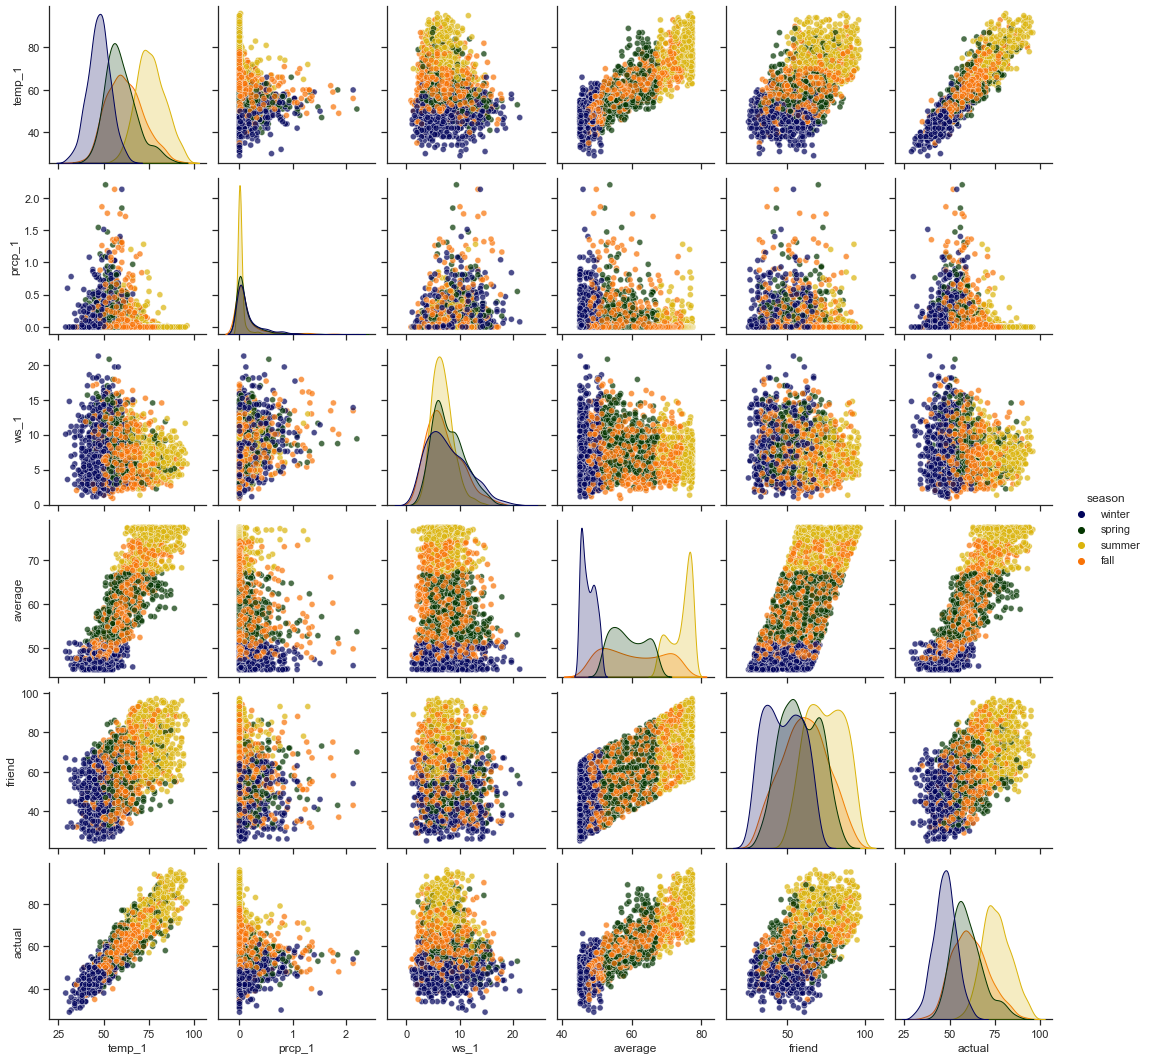

In [4]:
# Create columns of seasons for pair plotting colors
seasons = []
for month in features['month']:
    if month in [1, 2, 12]:
        seasons.append('winter')
    elif month in [3, 4, 5]:
        seasons.append('spring')
    elif month in [6, 7, 8]:
        seasons.append('summer')
    elif month in [9, 10, 11]:
        seasons.append('fall')
# Will only use six variables for plotting pairs
reduced_features = features[['temp_1', 'prcp_1', 'ws_1', 'average', 'friend', 'actual']]
reduced_features['season'] = seasons
# Use seaborn for pair plots
import seaborn as sns
sns.set(style="ticks", color_codes=True);
# Create a custom color palete
palette = sns.xkcd_palette(['dark blue', 'dark green', 'gold', 'orange'])
# Make the pair plot with a some aesthetic changes
sns.pairplot(reduced_features, hue = 'season', diag_kind = 'kde', palette= palette, plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True))

## Data Preparation 

In [5]:
# One Hot Encoding 
features = pd.get_dummies(features)

# Extract labels and features 
labels = features['actual']
features = features.drop('actual', axis=1)

feature_list = ['temp_1', 'average', 'ws_1', 'temp_2', 'friend', 'year']
# feature_list = important_feature_names[:]
features = features[feature_list]

# Convert to numpy arrays 
import numpy as np 
features = np.array(features)
labels = np.array(labels)

In [6]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
original_features = pd.read_csv('kaggle/input/tempscsv/temps.csv')
original_features = pd.get_dummies(original_features)
original_labels = np.array(original_features['actual'])
original_features= original_features.drop('actual', axis = 1)
original_feature_list = list(original_features.columns)
original_features = np.array(original_features)
original_train_features, original_test_features, original_train_labels, original_test_labels = train_test_split(original_features, original_labels, test_size = 0.25, random_state = 42)

# The baseline predictions are the historical averages
baseline_preds = original_test_features[:, original_feature_list.index('average')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - original_test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'degrees.')

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(original_train_features, original_train_labels);

# Use the forest's predict method on the test data
predictions = rf.predict(original_test_features)

# Calculate the absolute errors
errors = abs(predictions - original_test_labels)

# Print out the mean absolute error (mae)
print('Average model error:', round(np.mean(errors), 2), 'degrees.')

# Compare to baseline
improvement_baseline = 100 * abs(np.mean(errors) - np.mean(baseline_errors)) / np.mean(baseline_errors)
print('Improvement over baseline:', round(improvement_baseline, 2), '%.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / original_test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Average baseline error:  5.06 degrees.
Average model error: 3.83 degrees.
Improvement over baseline: 24.24 %.
Accuracy: 93.99 %.


In [7]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1643, 6)
Training Labels Shape: (1643,)
Testing Features Shape: (548, 6)
Testing Labels Shape: (548,)


### Establish on New Baseline

In [8]:
# Find the original feature indices 
original_feature_indices = [feature_list.index(feature) for feature in
                                      feature_list if feature not in
                                      ['ws_1', 'prcp_1', 'snwd_1']]

# Create a test set of the original features
original_test_features = test_features[:, original_feature_indices]   # rf.predict(original_test_features) and to compare original_test_labels

# Make predictions on test data using the model trained on original data
baseline_predictions = predictions

# Performance metrics
baseline_errors = abs(baseline_predictions - original_test_labels)

print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(baseline_errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
baseline_mape = 100 * np.mean((baseline_errors / original_test_labels))

# Calculate and display accuracy
baseline_accuracy = 100 - baseline_mape
print('Accuracy:', round(baseline_accuracy, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 3.83 degrees.
Accuracy: 93.99 %.


### Establish on Expanded Data and Features¶

In [9]:
rf_exp = RandomForestRegressor(n_estimators= 1000, random_state=42)
rf_exp.fit(train_features, train_labels);

# Make predictions on test data
predictions = rf_exp.predict(test_features)

# Performance metrics
errors = abs(predictions - test_labels)

print('Metrics for Random Forest Trained on Expanded Data')
print('Average absolute error:', round(np.mean(errors), 4), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / test_labels))

# Compare to baseline
improvement_baseline = 100 * abs(mape - baseline_mape) / baseline_mape
print('Improvement over baseline:', round(improvement_baseline, 2), '%.')

# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Random Forest Trained on Expanded Data
Average absolute error: 3.8212 degrees.
Improvement over baseline: 7.17 %.
Accuracy: 93.56 %.


## Examine Grid Search with ML Models

### Feature Reduction
From previous experience and the graphs produced at the beginning, we know that some features are not useful for our temperature prediction problem. To reduce the number of features, which will reduce runtime, hopefully without significantly reducing performance, we can examine the feature importances from the random forest.

In [10]:
# Get numerical feature importances
importances = list(rf_exp.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.84
Variable: average              Importance: 0.07
Variable: ws_1                 Importance: 0.03
Variable: temp_2               Importance: 0.02
Variable: friend               Importance: 0.02
Variable: year                 Importance: 0.01


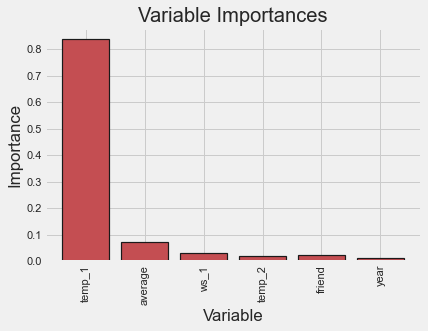

In [11]:
# Reset style 
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

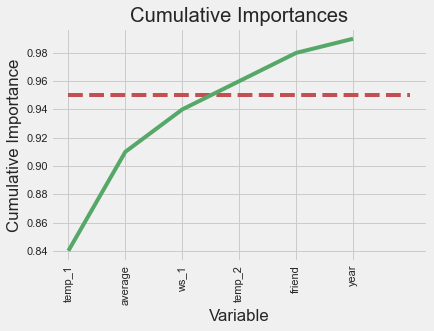

In [12]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [13]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:6]]
# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]

# Create training and testing sets with only the important features
important_train_features = train_features[:, important_indices]
important_test_features = test_features[:, important_indices]

# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Number of features for 95% importance: 4
Important train features shape: (1643, 6)
Important test features shape: (548, 6)


In [14]:
rf_exp.fit(important_train_features, train_labels);
# Make predictions on test data
exp_predictions = rf_exp.predict(important_test_features)

# Performance metrics
exp_errors = abs(exp_predictions - test_labels)

print('Average absolute error:', round(np.mean(errors), 4), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
exp_mape = 100 * (exp_errors / test_labels)

# Calculate and display accuracy
exp_accuracy = 100 - np.mean(exp_mape)
print('Accuracy:', round(exp_accuracy, 2), '%.')

Average absolute error: 3.8212 degrees.
Accuracy: 93.56 %.


### Random Search with Cross Validation

In [15]:
rf = RandomForestRegressor(random_state=42)
from pprint import pprint 
# Initial parameters
print('Parameters currently used: \n')
pprint(rf.get_params())

Parameters currently used: 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [16]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random parameters grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [17]:
from sklearn.model_selection import RandomizedSearchCV
# Random search of parameters, using 3 fold cross validation, search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [18]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

### Evaluation Function 

In [19]:
def evaluate_models(model, test_features, test_labels): 
    predictions = model.predict(test_features)
    erros = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
# Split into training and testing sets 
# evaluate_models(rf, features, labels, param_grid=random_grid)

#### Evaluate the default model 

In [20]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_accuracy = evaluate_models(base_model, test_features, test_labels)

Model Performance
Average Error: 3.8212 degrees.
Accuracy = 93.56%.


#### Evaluate the best random search model

In [21]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate_models(best_random, test_features, test_labels)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 3.8212 degrees.
Accuracy = 93.56%.
Improvement of 0.00%.


## Grid Search
We can now perform grid search building on the result from the random search. We will test a range of hyperparameters around the best values returend by random search. 

In [22]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110, 120, None],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5, 6, 7],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [70, 100, 125, 200, 300, 1000]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           scoring = 'neg_mean_absolute_error', cv = 3, 
                           n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(train_features, train_labels)

Fitting 3 folds for each of 1620 candidates, totalling 4860 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [80, 90, 100, 110, 120, None],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [3, 4, 5, 6, 7],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [70, 100, 125, 200, 300, 1000]},
             scoring='neg_mean_absolute_error', verbose=2)

In [23]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

In [24]:
best_grid = grid_search.best_estimator_
evaluate_models(best_grid, test_features, test_labels)

Model Performance
Average Error: 3.8212 degrees.
Accuracy = 93.56%.


93.55784930644108

In [25]:
"""
print('Model Parameters:\n')
pprint(best_grid.get_params())
print('\n')
evaluate(best_grid, test_features, test_labels)
"""

final_model = grid_search
print('Final Model Parameters: \n')
pprint(final_model.get_params())
grid_final_accuracy = evaluate_models(final_model, test_features, test_labels)

Final Model Parameters: 

{'cv': 3,
 'error_score': nan,
 'estimator': RandomForestRegressor(),
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'mse',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'n_jobs': -1,
 'param_grid': {'bootstrap': [True],
                'max_depth': [80, 90, 100, 110, 120, None],
                'max_features': [2, 3, 4],
                'min_samples_leaf': [3, 4, 5, 6, 7],
                'min_samples_split': [8, 10, 12],
                'n_estimators': [

### Check Feature Importance

In [26]:
base_model.feature_importances_

array([0.86063497, 0.04965651, 0.03157859, 0.0193443 , 0.0247884 ,
       0.01399724])

In [27]:
# Evaluate run time and prediction accuracy
import time
def evaluate_model(model, x_train, y_train, x_test, y_test):
    n_trees = model.get_params()['n_estimators']
    n_features = x_train.shape[1]
    
    # Train and predict 10 times to evaluate time and accuracy
    predictions = []
    run_times = []
    for _ in range(10):
        start_time = time.time()
        model.fit(x_train, y_train)
        predictions.append(model.predict(x_test))
    
        end_time = time.time()
        run_times.append(end_time - start_time)
    
    # Run time and predictions need to be averaged
    run_time = np.mean(run_times)
    predictions = np.mean(np.array(predictions), axis = 0)
    
    # Calculate performance metrics
    errors = abs(predictions - y_test)
    mean_error = np.mean(errors)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    
    # Return results in a dictionary
    results = {'time': run_time, 'error': mean_error, 'accuracy': accuracy, 'n_trees': n_trees, 'n_features': n_features}
    
    return results

## Visualize Tree in the Forest 

In [28]:
# Export the tree using sklearn 
from sklearn.tree import export_graphviz 

# Write the decision tree as a dot file 
visual_tree = final_model.best_estimator_[12]
export_graphviz(visual_tree, out_file='best_tree.dot', feature_names = feature_list, 
               precision=2, filled=True, rounded=True, max_depth=None)

# Converting to image using pydot 
import pydot 
# Import the dot file to a graph and then convert to a png 
(graph, ) = pydot.graph_from_dot_file('best_tree.dot')
graph.write_png('best_tree.png')

Text(0.5, 1.0, 'Model Accuracy Comparison')

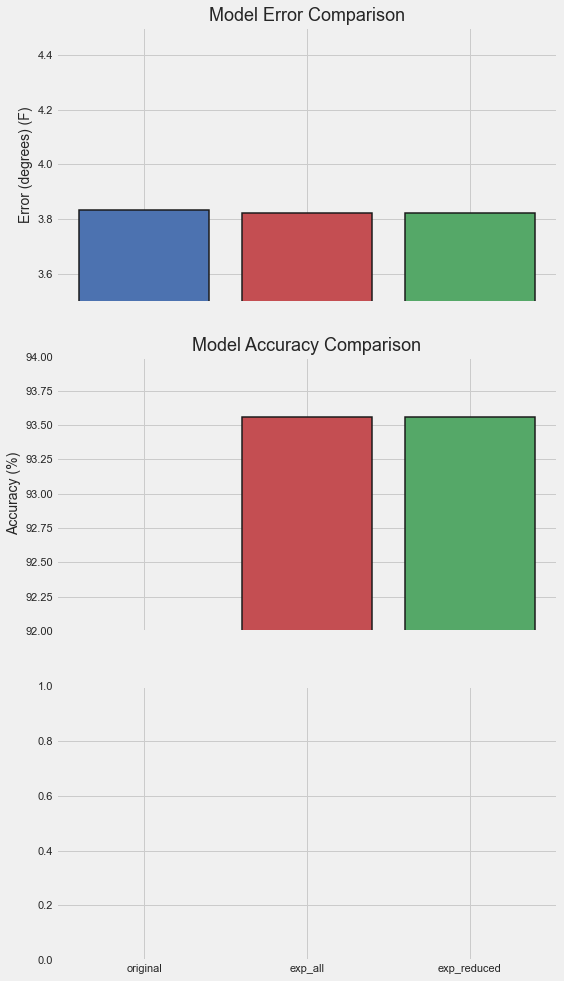

In [29]:
# Calculate mean absolute error for each model
original_mae = np.mean(abs(baseline_predictions - original_test_labels))
exp_all_mae = np.mean(abs(exp_predictions - test_labels))
exp_reduced_mae = np.mean(abs(predictions - test_labels))

# Calculate accuracy for model trained on 1 year of data
original_accuracy = improvement_baseline # 100 * (1 - np.mean(abs(original_features_predictions - test_labels) / test_labels))

# Create a dataframe for comparison
model_comparison = pd.DataFrame({'model': ['original', 'exp_all', 'exp_reduced'], 
                                 'error (degrees)':  [original_mae, exp_all_mae, exp_reduced_mae],
                                 'accuracy': [original_accuracy, exp_accuracy, base_accuracy],})
# Order the dataframe
model_comparison = model_comparison[['model', 'error (degrees)', 'accuracy']]

# Make plots 
# Set up the plotting layout
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize = (8,16), sharex = True)

# Set up x-axis
x_values = [0, 1, 2]
labels = list(model_comparison['model'])
plt.xticks(x_values, labels)

# Set up fonts
fontdict = {'fontsize': 18}
fontdict_yaxis = {'fontsize': 14}

# Error Comparison
ax1.bar(x_values, model_comparison['error (degrees)'], color = ['b', 'r', 'g'], edgecolor = 'k', linewidth = 1.5)
ax1.set_ylim(bottom = 3.5, top = 4.5)
ax1.set_ylabel('Error (degrees) (F)', fontdict = fontdict_yaxis); 
ax1.set_title('Model Error Comparison', fontdict= fontdict)

# Accuracy Comparison
ax2.bar(x_values, model_comparison['accuracy'], color = ['b', 'r', 'g'], edgecolor = 'k', linewidth = 1.5)
ax2.set_ylim(bottom = 92, top = 94)
ax2.set_ylabel('Accuracy (%)', fontdict = fontdict_yaxis); 
ax2.set_title('Model Accuracy Comparison', fontdict= fontdict)

# Run Time Comparison
# ax3.bar(x_values, model_comparison['run_time (s)'], color = ['b', 'r', 'g'], edgecolor = 'k', linewidth = 1.5)
# ax3.set_ylim(bottom = 2, top = 12)
# ax3.set_ylabel('Run Time (sec)', fontdict = fontdict_yaxis); 
# ax3.set_title('Model Run-Time Comparison', fontdict= fontdict);